In [1]:
# import os
# import numpy as np
# import pandas as pd
# import seaborn as sns
from scipy import stats
# from meus.printer import *
from tabulate import tabulate as tb
# from datetime import datetime
# import matplotlib.pyplot as plt

In [2]:
fonte = 15
params = {
        'font.size': 15,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte
}
plt.rcParams.update(params)

os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-5-14'

In [3]:
print_campo = 'n'

if print_campo == 's':
    g = 1
    dpi=300
    lista_pastas = 'Age City Sex Area Renda Corre'.split(' ')
    for c in lista_pastas:
        try:
            os.mkdir(c)
            print('Directory '+c+' created')
        except FileExistsError:
            print('Directory '+c+' already exists')

In [4]:
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> artigo
5 -> cities.csv
6 -> covid19_municipios.csv
7 -> COVID19_REGIOES BR.csv
8 -> Dados_demográficos_municípios.xlsx
9 -> Dados_demográficos_municípios_new.xlsx
10 -> Datalab_COVID.pptx
11 -> figures
12 -> idade.xlsx
13 -> obito_cartorio.csv
14 -> População residente municipal x população faixa etária.csv
15 -> População residente por estado - 2015.csv
16 -> População residente x sexo.csv
17 -> results


In [5]:
date = 3
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
77233,NaN,43.0,2020-05-13,20,11377239.0,False,True,2917,25.63891,2020-05-12,0.0381,111,65,state,RS,0,0
77234,NaN,42.0,2020-05-13,20,7164788.0,False,True,3733,52.10203,2020-05-12,0.0196,73,63,state,SC,0,0
77235,NaN,28.0,2020-05-13,20,2298696.0,False,True,2032,88.39794,2020-05-12,0.0182,37,61,state,SE,0,0
77236,NaN,35.0,2020-05-13,20,45919049.0,True,False,51097,111.27626,2020-05-13,0.0806,4118,79,state,SP,3378,169
77237,NaN,17.0,2020-05-13,20,1572866.0,False,True,828,52.64276,2020-05-11,0.0169,14,57,state,TO,0,0


In [13]:
df_cov = df_cov[
        (df_cov['date'] == df_cov['date'].tail(1).values[0]) & 
        (df_cov['place_type'] == 'city') & 
        (df_cov['last_available_confirmed'] > 1)
][[
    "city",
    "state",
    "estimated_population_2019",
    "last_available_confirmed",
    "last_available_deaths",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_death_rate",
]]
df_cov = df_cov.rename(columns={
    "city": "City",
    "state": "State",
    "estimated_population_2019": "Population",
    "last_available_confirmed": "Confirmed",
    "last_available_deaths": "Deaths",
    "last_available_confirmed_per_100k_inhabitants": "Confirmed-100k",
    "last_available_death_rate": "Death Rate",
})
df_cov.head()

,City,State,Population,Confirmed,Deaths,Confirmed-100k,Death Rate
74172,Acrelândia,AC,15256.0,39,1,255.63713,0.0256
74174,Brasiléia,AC,26278.0,3,0,11.41639,0.0000
74175,Bujari,AC,10266.0,16,0,155.85428,0.0000
74177,Cruzeiro do Sul,AC,88376.0,125,1,141.44112,0.0080
74178,Epitaciolândia,AC,18411.0,2,0,10.86307,0.0000


In [14]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 74172 to 77210
Data columns (total 7 columns):
City              2265 non-null object
State             2265 non-null object
Population        2250 non-null float64
Confirmed         2265 non-null int64
Deaths            2265 non-null int64
Confirmed-100k    2250 non-null float64
Death Rate        2265 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 141.6+ KB


In [16]:
date = 12
df_age =  pd.read_excel('..\\'+directory[date])
df_age.head()

,City,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+,Male,Female
0,Abadia de Goiás,542,592,654,738,712,676,661,628,583,486,493,401,269,190,130,76,68,3851,4048
1,Abadia dos Dourados,488,373,488,586,459,513,540,489,588,588,409,425,338,298,175,120,138,3562,3453
2,Abadiânia,1056,1220,1517,1773,1749,1454,1416,1481,1407,1292,1014,804,615,488,350,255,179,9311,8759
3,Abaeté,1337,1445,1800,1737,1723,1866,1700,1572,1601,1788,1668,1491,1159,906,680,470,594,11764,11773
4,Abaetetuba,13306,13949,14402,16028,15908,14122,13018,10887,9103,7195,5684,4861,3886,2793,2052,1258,1402,76696,73158


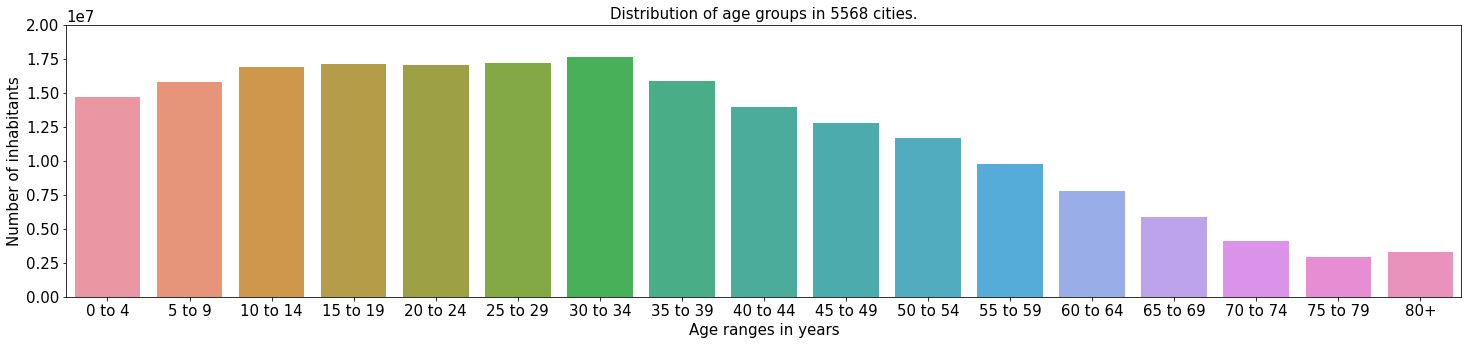

In [17]:
plt.figure(figsize=(25,5))
sns.barplot(
    x=df_age[df_age.columns[1:-2]].sum().index,
    y=df_age[df_age.columns[1:-2]].sum().values
)
plt.title('Distribution of age groups in ' + str(len(df_age)) + ' cities.')
plt.xlabel('Age ranges in years')
plt.ylabel('Number of inhabitants')
plt.ylim(0, 20000000)
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [18]:
df_age_ed = pd.DataFrame();
df_age_ed['City'] = df_age['City']
df_age_ed['Children'] = df_age['0 to 4'] + df_age['5 to 9']
df_age_ed['Teenager'] = df_age['10 to 14'] + df_age['15 to 19']
df_age_ed['Young adults'] = df_age['20 to 24'] + df_age['25 to 29']
df_age_ed['Adults'] = df_age['30 to 34'] + df_age['35 to 39'] + df_age['40 to 44'] + df_age['45 to 49'] + df_age['50 to 54'] + df_age['55 to 59'] + df_age['60 to 64']
df_age_ed['Seniors'] = df_age['65 to 69'] + df_age['70 to 74'] + df_age['75 to 79'] + df_age['80+']
df_age_ed['Population_Age'] = df_age_ed['Children'] + df_age_ed['Teenager'] + df_age_ed['Young adults'] + df_age_ed['Adults'] + df_age_ed['Seniors']
df_age_ed['Children (%)'] = round(df_age_ed['Children']/df_age_ed['Population_Age'], 2)
df_age_ed['Teenager (%)'] = round(df_age_ed['Teenager']/df_age_ed['Population_Age'], 2)
df_age_ed['Young adults (%)'] = round(df_age_ed['Young adults']/df_age_ed['Population_Age'], 2)
df_age_ed['Adults (%)'] = round(df_age_ed['Adults']/df_age_ed['Population_Age'], 2)
df_age_ed['Seniors (%)'] = round(df_age_ed['Seniors']/df_age_ed['Population_Age'], 2)
df_age_ed['Male'] = df_age['Male']
df_age_ed['Female'] = df_age['Female']
df_age_ed['Male (%)'] = round(df_age['Male']/(df_age['Male']+df_age['Female']), 2)
df_age_ed['Female (%)'] = round(df_age['Female']/(df_age['Male']+df_age['Female']), 2)
df_age_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 16 columns):
City                5568 non-null object
Children            5568 non-null int64
Teenager            5568 non-null int64
Young adults        5568 non-null int64
Adults              5568 non-null int64
Seniors             5568 non-null int64
Population_Age      5568 non-null int64
Children (%)        5568 non-null float64
Teenager (%)        5568 non-null float64
Young adults (%)    5568 non-null float64
Adults (%)          5568 non-null float64
Seniors (%)         5568 non-null float64
Male                5568 non-null int64
Female              5568 non-null int64
Male (%)            5568 non-null float64
Female (%)          5568 non-null float64
dtypes: float64(7), int64(8), object(1)
memory usage: 696.1+ KB


In [19]:
df_age_ed = df_age_ed[[
    "City",
    "Children",
    "Teenager",
    "Young adults",
    "Adults",
    "Seniors",
    "Children (%)",
    "Teenager (%)",
    "Young adults (%)",
    "Adults (%)",
    "Seniors (%)",
    "Male",
    "Female",
    "Male (%)",
    "Female (%)",
]]
df_age_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 15 columns):
City                5568 non-null object
Children            5568 non-null int64
Teenager            5568 non-null int64
Young adults        5568 non-null int64
Adults              5568 non-null int64
Seniors             5568 non-null int64
Children (%)        5568 non-null float64
Teenager (%)        5568 non-null float64
Young adults (%)    5568 non-null float64
Adults (%)          5568 non-null float64
Seniors (%)         5568 non-null float64
Male                5568 non-null int64
Female              5568 non-null int64
Male (%)            5568 non-null float64
Female (%)          5568 non-null float64
dtypes: float64(7), int64(7), object(1)
memory usage: 652.6+ KB


In [21]:
date = 9
df_mun =  pd.read_excel('..\\'+directory[date], skiprows=1)
df_mun.head()

,Municípios,UF,Área Territorial - km² [2018],População estimada - pessoas [2019],Densidade demográfica - hab/km² [2010],IDHM - Índice de desenvolvimento humano municipal [2010],Renda per capita (Salário médio mensal dos trabalhadores formais [2017])
0,Poá,SP,17.264,117452,6141.05,0.771,3.3
1,Santos,SP,281.033,433311,1494.26,0.84,1.5
2,São Domingos do Sul,RS,78.67,3074,37.06,0.763,3.6
3,São Francisco do Sul,SC,493.418,52721,85.27,0.762,1.7
4,São Gabriel,RS,5051.85,62105,12.03,0.699,2.0


In [22]:
df_mun = df_mun[[
    "Municípios",
    "Área Territorial - km² [2018]",
    "Densidade demográfica - hab/km² [2010]",
    "IDHM - Índice de desenvolvimento humano municipal [2010]",
    "Renda per capita (Salário médio mensal dos trabalhadores formais [2017])",
]]
df_mun = df_mun.rename(columns={
    "Municípios": "City",
    "Área Territorial - km² [2018]": "Area (km²)",
    "Densidade demográfica - hab/km² [2010]": "Demographic density (hab/km²)",
    "IDHM - Índice de desenvolvimento humano municipal [2010]": "MHDI",
    "Renda per capita (Salário médio mensal dos trabalhadores formais [2017])": "Income (per capita)",
})
df_mun['Area (km²)'] = df_mun['Area (km²)'].astype('float64')
df_mun['Demographic density (hab/km²)'] = df_mun['Demographic density (hab/km²)'].astype('float64')
df_mun['MHDI'] = df_mun['MHDI'].astype('float64')
df_mun.head()

,City,Area (km²),Demographic density (hab/km²),MHDI,Income (per capita)
0,Poá,17.264,6141.05,0.771,3.3
1,Santos,281.033,1494.26,0.840,1.5
2,São Domingos do Sul,78.670,37.06,0.763,3.6
3,São Francisco do Sul,493.418,85.27,0.762,1.7
4,São Gabriel,5051.850,12.03,0.699,2.0


In [23]:
df_prev = pd.merge(df_cov, df_mun, on="City")
df = pd.merge(df_prev, df_age_ed, on="City")
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 567
Data columns (total 25 columns):
City                             568 non-null object
State                            568 non-null object
Population                       568 non-null float64
Confirmed                        568 non-null int64
Deaths                           568 non-null int64
Confirmed-100k                   568 non-null float64
Death Rate                       568 non-null float64
Area (km²)                       568 non-null float64
Demographic density (hab/km²)    568 non-null float64
MHDI                             568 non-null float64
Income (per capita)              568 non-null float64
Children                         568 non-null int64
Teenager                         568 non-null int64
Young adults                     568 non-null int64
Adults                           568 non-null int64
Seniors                          568 non-null int64
Children (%)                     568 non-null f

In [24]:
df_age_cov = pd.merge(df['City'], df_age, on='City')
df_age_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 775
Data columns (total 20 columns):
City        776 non-null object
0 to 4      776 non-null int64
5 to 9      776 non-null int64
10 to 14    776 non-null int64
15 to 19    776 non-null int64
20 to 24    776 non-null int64
25 to 29    776 non-null int64
30 to 34    776 non-null int64
35 to 39    776 non-null int64
40 to 44    776 non-null int64
45 to 49    776 non-null int64
50 to 54    776 non-null int64
55 to 59    776 non-null int64
60 to 64    776 non-null int64
65 to 69    776 non-null int64
70 to 74    776 non-null int64
75 to 79    776 non-null int64
80+         776 non-null int64
Male        776 non-null int64
Female      776 non-null int64
dtypes: int64(19), object(1)
memory usage: 127.3+ KB


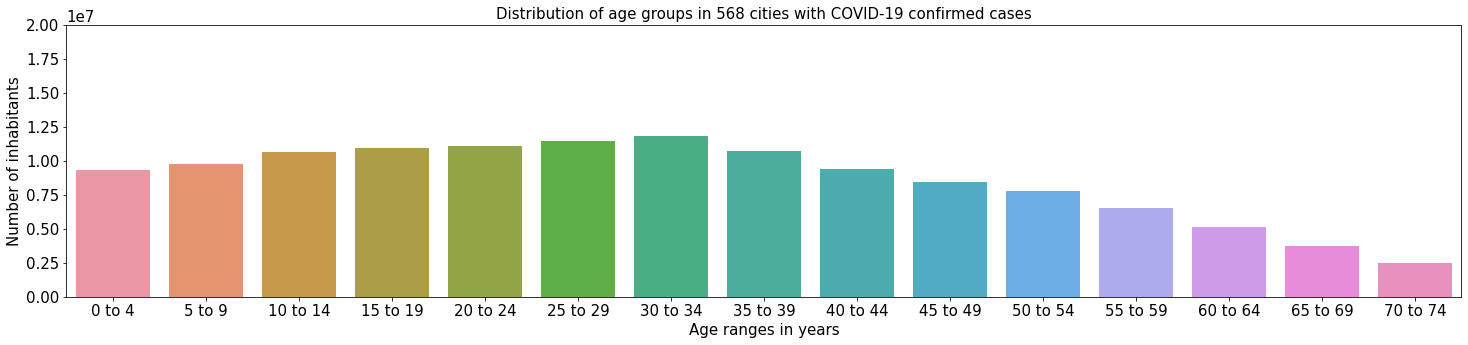

In [25]:
plt.figure(figsize=(25,5))
sns.barplot(
    x=df_age_cov[df_age_cov.columns[1:-4]].sum().index,
    y=df_age_cov[df_age_cov.columns[1:-4]].sum().values
)
plt.title('Distribution of age groups in ' + str(len(df)) + ' cities with COVID-19 confirmed cases')
plt.xlabel('Age ranges in years')
plt.ylabel('Number of inhabitants')
plt.ylim(0, 20000000)
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [26]:
df['Confirmed'].sum()

162927

In [27]:
num_cid_stad = {
    'State': 'AC AL AP AM BA CE ES GO MA MT MS MG PA PB PR PE PI RJ RN RS RO RR SC SP SE TO'.split(' '),
    '#_cities': [22, 102, 16, 62, 417, 184, 78, 246, 217, 141, 79, 853, 144, 223, 399, 185, 224, 92, 167, 497, 52, 15, 295, 645, 75, 139]
}
num_cid_stad = pd.DataFrame(num_cid_stad)
num_cid_stad

,State,#_cities
0,AC,22
1,AL,102
2,AP,16
3,AM,62
4,BA,417
5,CE,184
6,ES,78
7,GO,246
8,MA,217
9,MT,141


In [28]:
df_state = pd.DataFrame(df['State'].value_counts()).reset_index()
df_state = df_state.rename(columns={
    "index": "State",
    "State": "count_cities",
})
df_states_conut = pd.merge(num_cid_stad, df_state, on=['State'])
df_states_conut['Cities (%)'] = round(df_states_conut['count_cities']/df_states_conut['#_cities'], 2)
df_states_conut

,State,#_cities,count_cities,Cities (%)
0,AC,22,7,0.32
1,AL,102,6,0.06
2,AP,16,1,0.06
3,AM,62,10,0.16
4,BA,417,37,0.09
5,CE,184,24,0.13
6,ES,78,19,0.24
7,GO,246,14,0.06
8,MA,217,10,0.05
9,MT,141,11,0.08


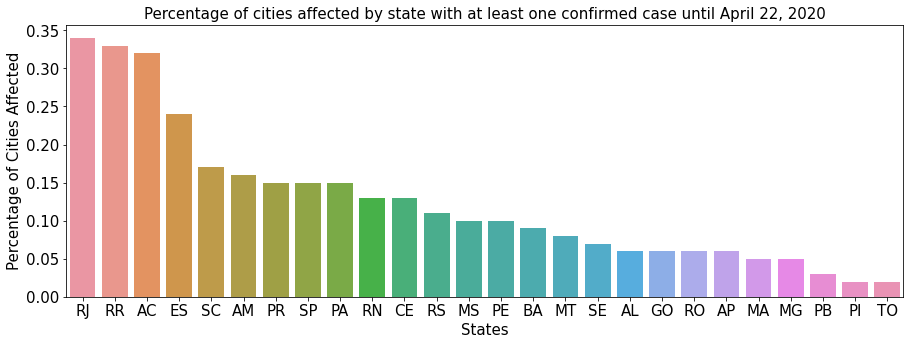

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(
    x='State',
    y='Cities (%)',
    data=df_states_conut.sort_values(by='Cities (%)', ascending=False)
)
plt.ylabel('Percentage of Cities Affected')
plt.xlabel('States')
plt.title('Percentage of cities affected by state with at least one confirmed case until April 22, 2020')
if print_campo == 's':
    col2 = lista_pastas[1]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

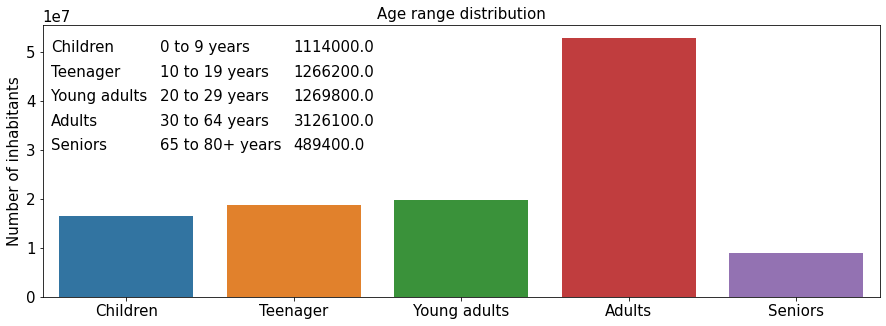

In [30]:
legend_range = [
    '0 to 9 years',
    '10 to 19 years',
    '20 to 29 years',
    '30 to 64 years',
    '65 to 80+ years',
]
legend_name = list()
legend_perc = list()
for c in range(11, 16):
    legend_name.append(df.columns[c])
    legend_perc.append(round(df.iloc[:, c].median()*100, 0))
 
plt.figure(figsize=(15,5))
sns.barplot(
    x=df[df.columns[11:-9]].sum().index,
    y=df[df.columns[11:-9]].sum().values
)
plt.title('Age range distribution')
a = 50000000
b = a/10
x = -0.45
y = a
for c in range(5):
    plt.text(x, y, legend_name[c])
    y -= b
x = 0.2
y = a
for c in range(5):
    plt.text(x, y, legend_range[c])
    y -= b
x = 1
y = a
for c in range(5):
    plt.text(x, y, legend_perc[c])
    y -= b
plt.ylabel("Number of inhabitants")
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

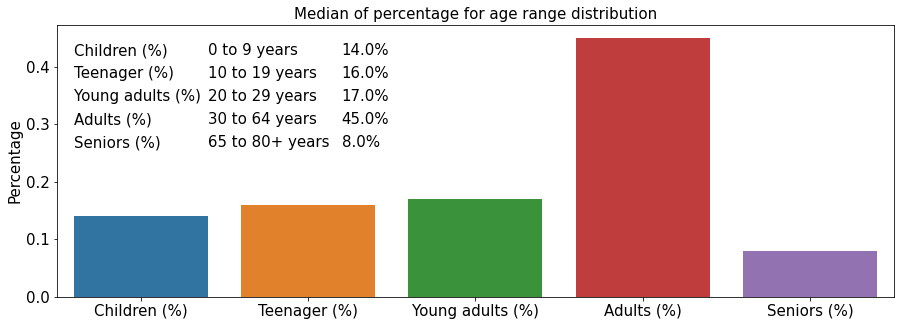

In [31]:
legend_name = list()
legend_perc = list()
for c in range(16, 21):
    legend_name.append(df.columns[c])
    legend_perc.append(str(round(df.iloc[:, c].median()*100, 0))+'%')
    
plt.figure(figsize=(15,5))
sns.barplot(
    x=df.iloc[:, 16:-4].median().index,
    y=df.iloc[:, 16:-4].median().values
)
plt.title('Median of percentage for age range distribution')
x = -0.4
y = 0.46
for c in range(5):
    y -= 0.04
    plt.text(x, y, legend_name[c])
x = 0.4
y = 0.46
for c in range(5):
    y -= 0.04
    plt.text(x, y, legend_range[c])
x = 1.2
y = 0.46
for c in range(5):
    y -= 0.04
    plt.text(x, y, legend_perc[c])
plt.ylabel("Percentage")
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

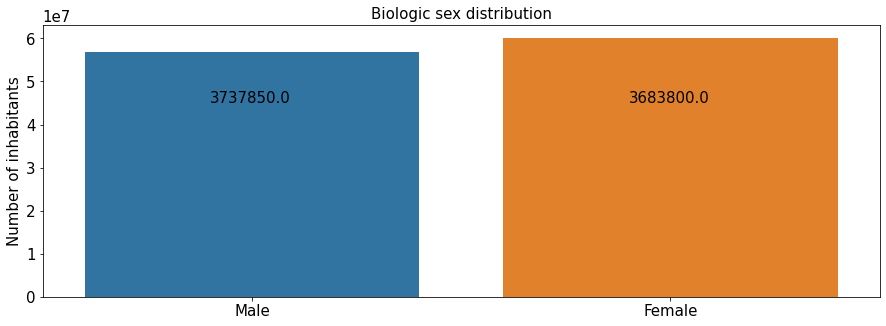

In [32]:
legend_name = list()
legend_perc = list()
for c in range(21, 24):
    legend_name.append(df.columns[c])
    legend_perc.append(round(df.iloc[:, c].median()*100, 0))
 
plt.figure(figsize=(15,5))
sns.barplot(
    x=df[df.columns[21:23]].sum().index,
    y=df[df.columns[21:23]].sum().values
)
plt.title('Biologic sex distribution')
x = -0.1
y = 45000000
plt.text(x, y, legend_perc[0])
x = 0.9
plt.text(x, y, legend_perc[1])
plt.ylabel("Number of inhabitants")
if print_campo == 's':
    col2 = lista_pastas[2]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

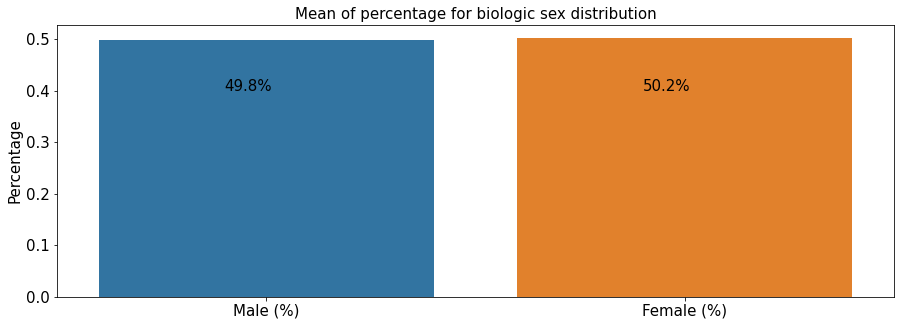

In [33]:
legend_name = list()
legend_perc = list()
for c in range(23, 25):
    legend_name.append(df.columns[c])
    legend_perc.append(str(round(df.iloc[:, c].mean()*100, 2))+'%')
    
plt.figure(figsize=(15,5))
sns.barplot(
    x=df.iloc[:, 23:].mean().index,
    y=df.iloc[:, 23:].mean().values
)
plt.title('Mean of percentage for biologic sex distribution')
x = -0.1
y = 0.4
plt.text(x, y, legend_perc[0])
x = 0.9
plt.text(x, y, legend_perc[1])
plt.ylabel("Percentage")
if print_campo == 's':
    col2 = lista_pastas[2]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 567
Data columns (total 25 columns):
City                             568 non-null object
State                            568 non-null object
Population                       568 non-null float64
Confirmed                        568 non-null int64
Deaths                           568 non-null int64
Confirmed-100k                   568 non-null float64
Death Rate                       568 non-null float64
Area (km²)                       568 non-null float64
Demographic density (hab/km²)    568 non-null float64
MHDI                             568 non-null float64
Income (per capita)              568 non-null float64
Children                         568 non-null int64
Teenager                         568 non-null int64
Young adults                     568 non-null int64
Adults                           568 non-null int64
Seniors                          568 non-null int64
Children (%)                     568 non-null f

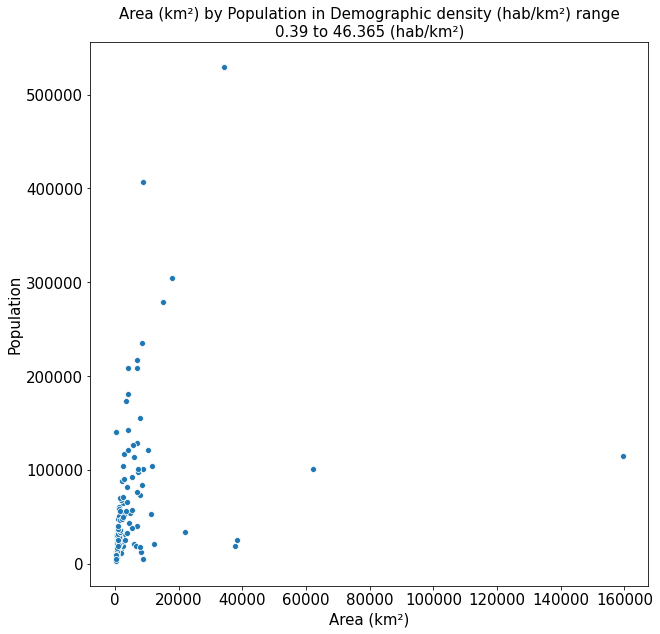

In [46]:
q1 = 3
q2 = q1 + 1
col1 = "Area (km²)"
col2 = "Population"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
#     size=col3,
#     hue=col3,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in '+col3+' range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

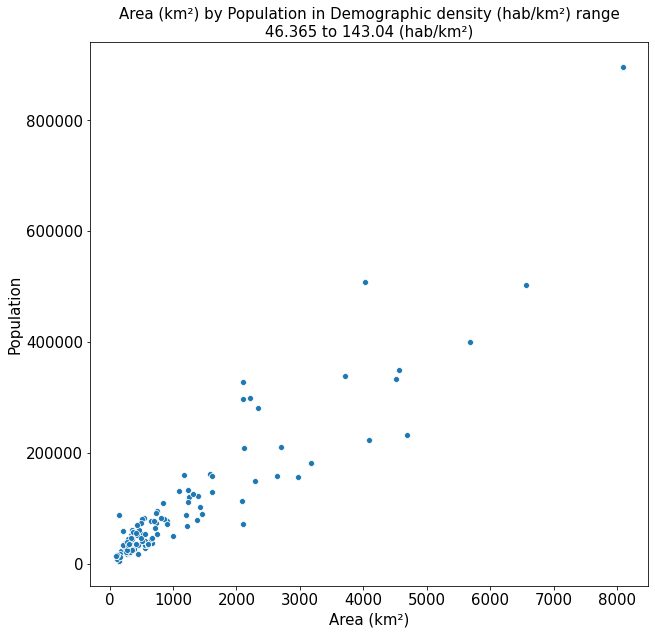

In [47]:
q1 += 1
q2 = q1 + 1
col1 = "Area (km²)"
col2 = "Population"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
#     size=col3,
#     hue=col3,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in '+col3+' range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

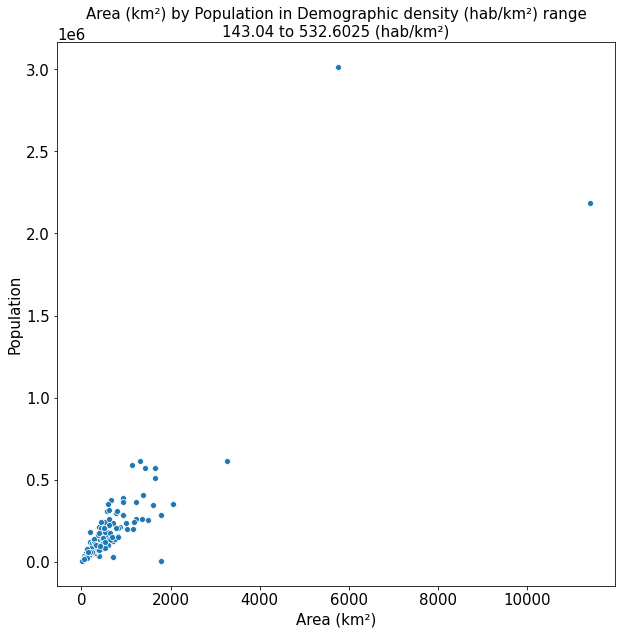

In [48]:
q1 += 1
q2 = q1 + 1
col1 = "Area (km²)"
col2 = "Population"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
#     size=col3,
#     hue=col3,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in '+col3+' range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

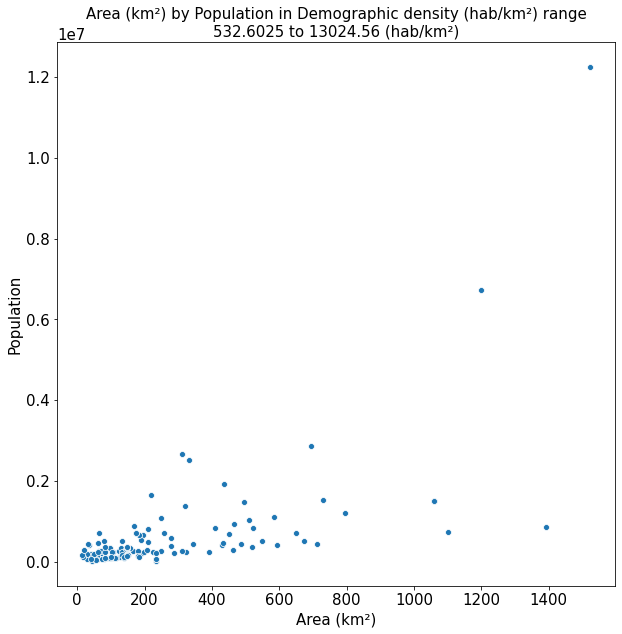

In [49]:
q1 += 1
q2 = q1 + 1
col1 = "Area (km²)"
col2 = "Population"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
#     size=col3,
#     hue=col3,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in '+col3+' range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 567
Data columns (total 25 columns):
City                             568 non-null object
State                            568 non-null object
Population                       568 non-null float64
Confirmed                        568 non-null int64
Deaths                           568 non-null int64
Confirmed-100k                   568 non-null float64
Death Rate                       568 non-null float64
Area (km²)                       568 non-null float64
Demographic density (hab/km²)    568 non-null float64
MHDI                             568 non-null float64
Income (per capita)              568 non-null float64
Children                         568 non-null int64
Teenager                         568 non-null int64
Young adults                     568 non-null int64
Adults                           568 non-null int64
Seniors                          568 non-null int64
Children (%)                     568 non-null f

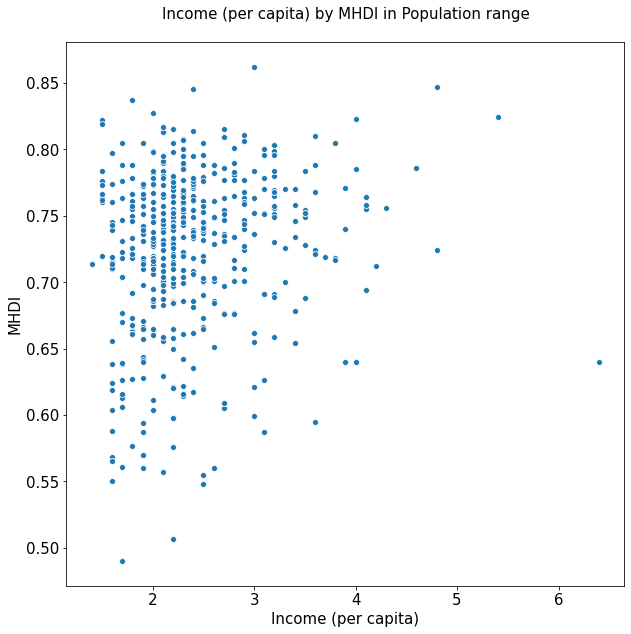

In [51]:
q1 = 1
q2 = q1 + 1
col1 = "Income (per capita)"
col3 = "Population"
col2 = "MHDI"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
#     hue=col3,
#     size=col3,
    sizes=(50,500),
    data=df,
)
plt.title(col1+' by '+col2+' in '+col3+' range\n')
if print_campo == 's':
    col2 = lista_pastas[4]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [52]:
df_mod = pd.DataFrame()
for k, v in enumerate(df.columns):
    if k in [5,6,8,9,10,16,17,18,19,20,23,24]:
        df_mod[v] = df[df['Confirmed-100k'] < 200][v]
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 1 to 567
Data columns (total 12 columns):
Confirmed-100k                   520 non-null float64
Death Rate                       520 non-null float64
Demographic density (hab/km²)    520 non-null float64
MHDI                             520 non-null float64
Income (per capita)              520 non-null float64
Children (%)                     520 non-null float64
Teenager (%)                     520 non-null float64
Young adults (%)                 520 non-null float64
Adults (%)                       520 non-null float64
Seniors (%)                      520 non-null float64
Male (%)                         520 non-null float64
Female (%)                       520 non-null float64
dtypes: float64(12)
memory usage: 52.8 KB


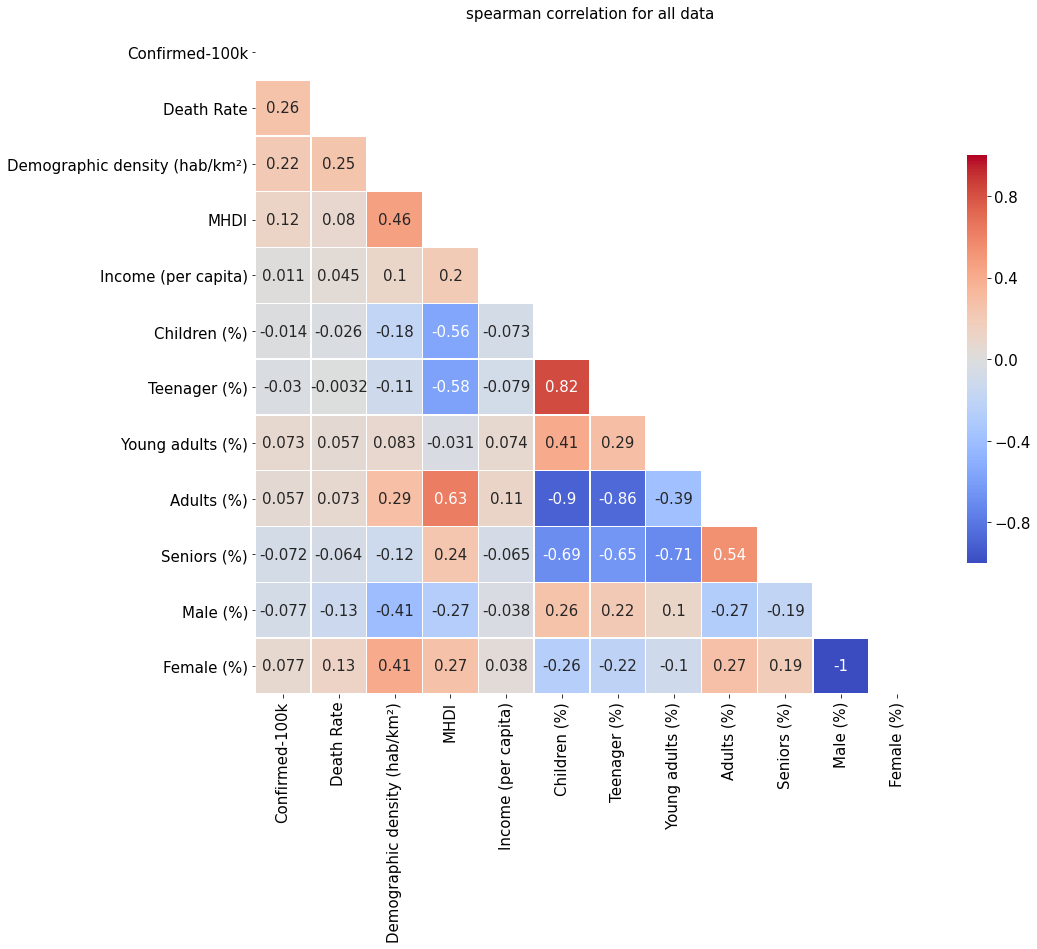

In [53]:
method=['pearson', 'kendall', 'spearman']
a = 2
corr = df_mod.corr(method=method[a])
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 15))
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    mask=mask
)
plt.title(method[a]+' correlation for all data')
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [54]:
g = 1
dpi=300
print_campo = 'n'
lista_pastas = 'Age City Sex Area Renda Corre'.split(' ')

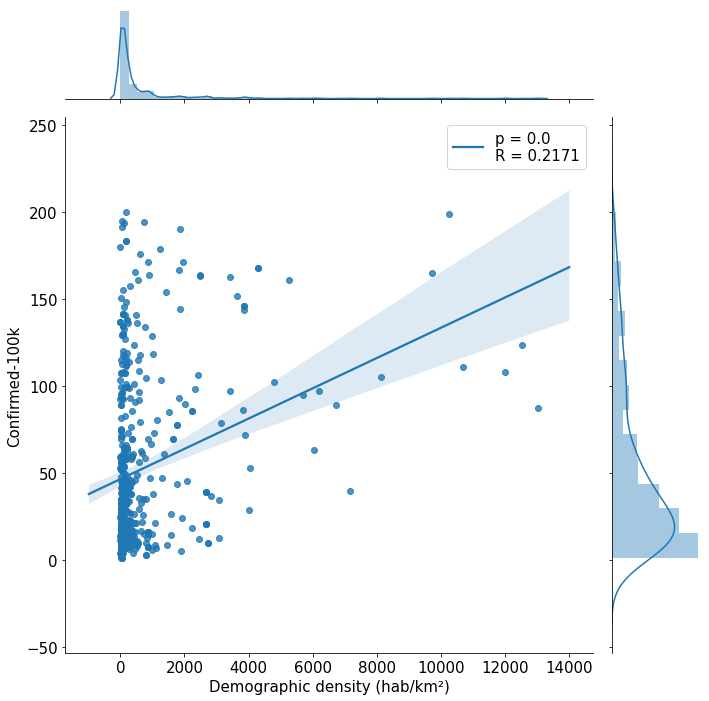

In [55]:
enter_fild = 2
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

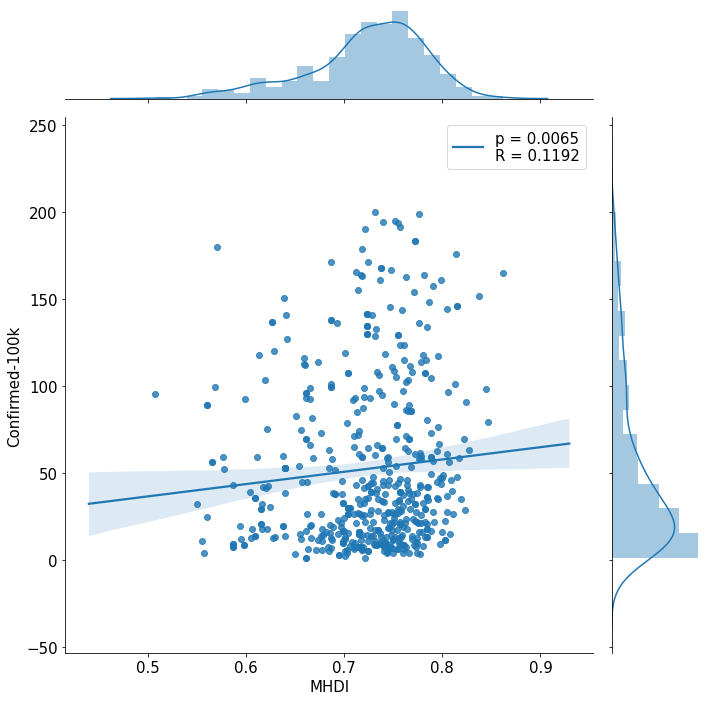

In [56]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

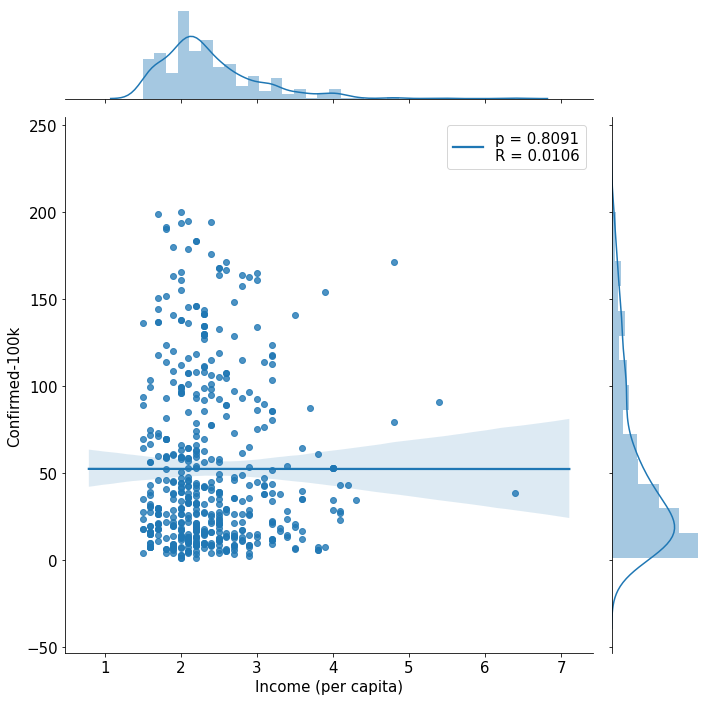

In [57]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

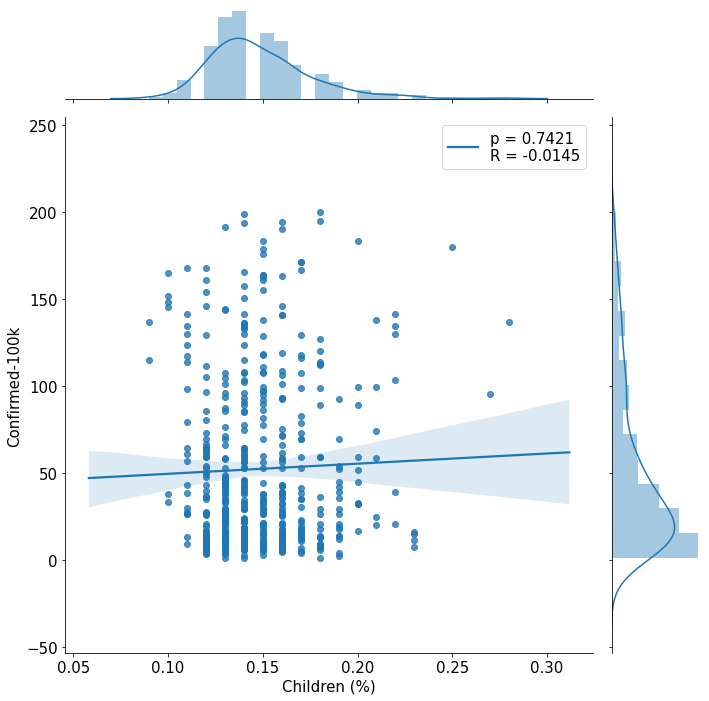

In [58]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

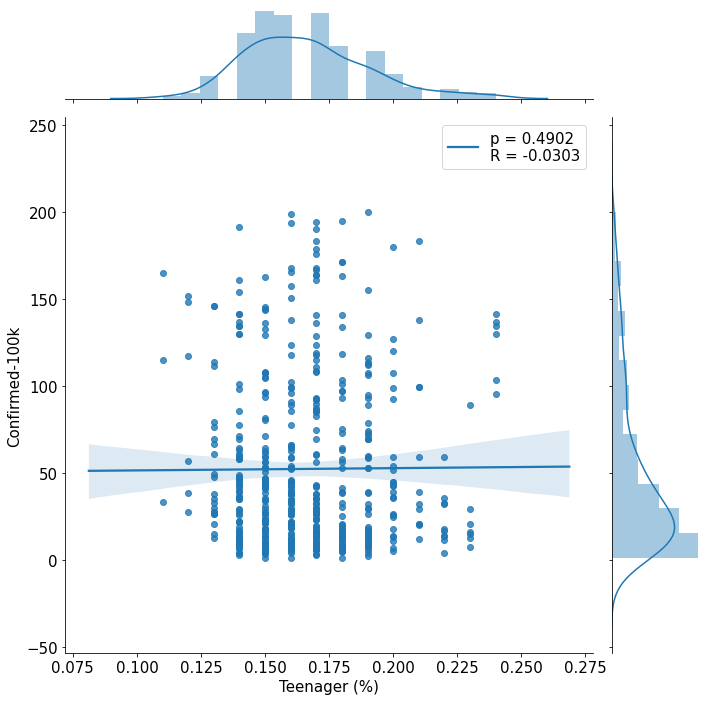

In [59]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

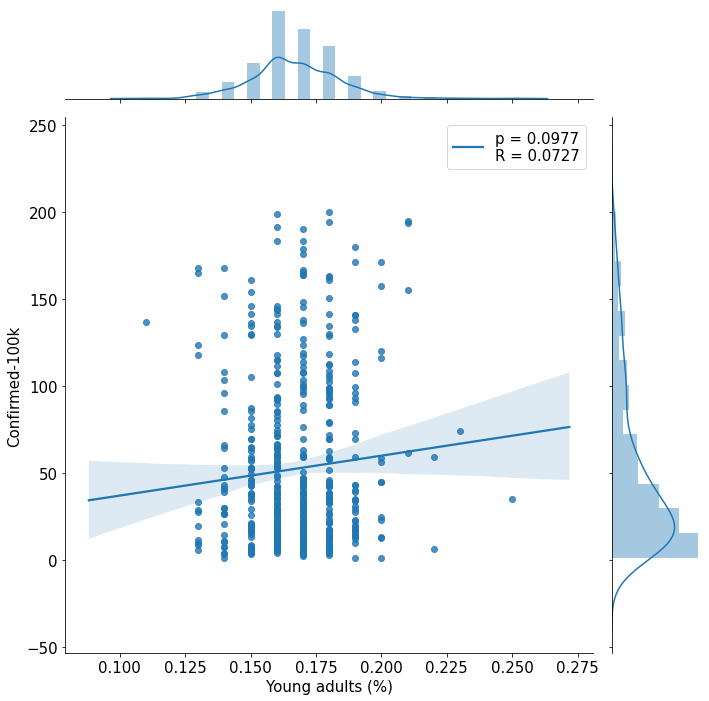

In [60]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

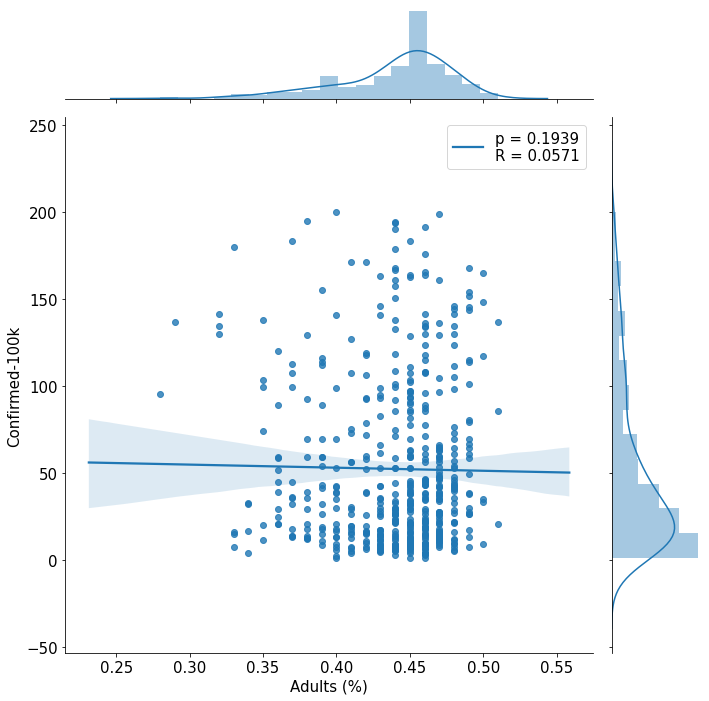

In [61]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

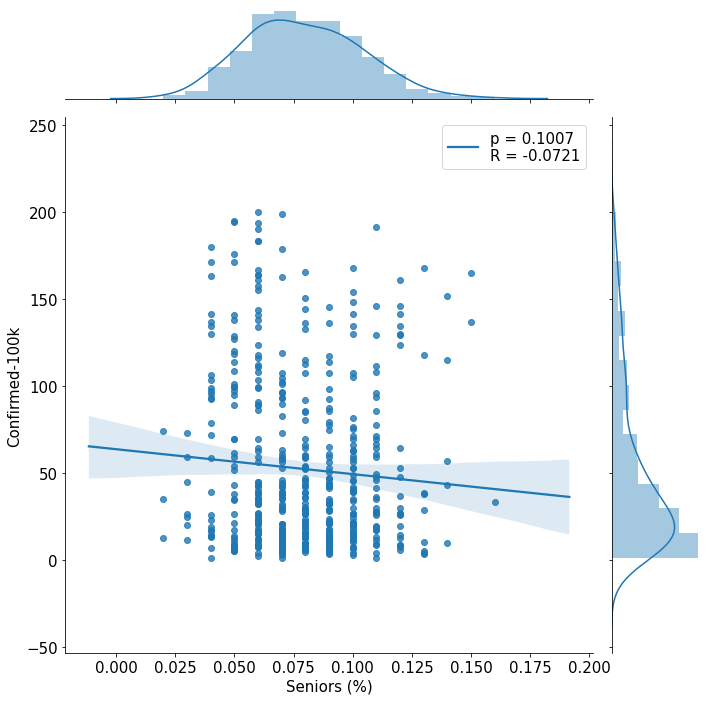

In [62]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

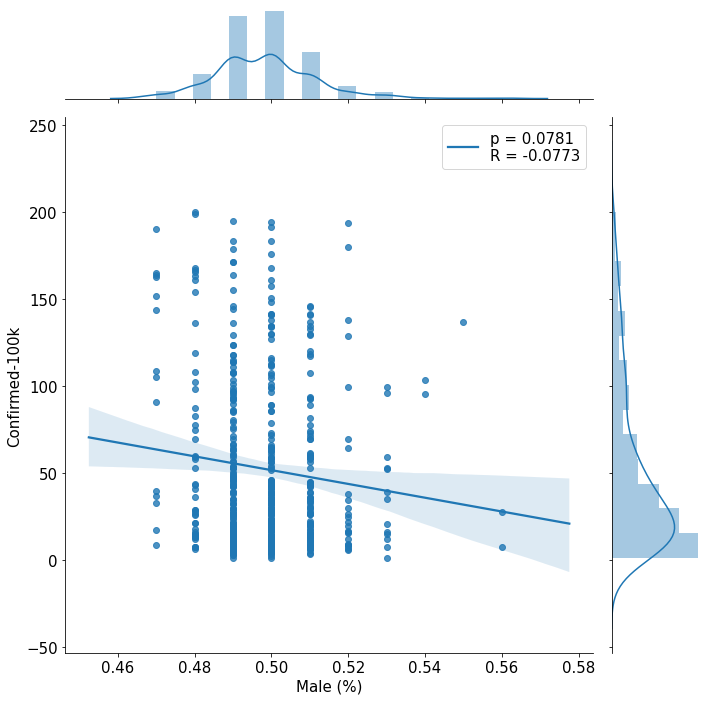

In [63]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

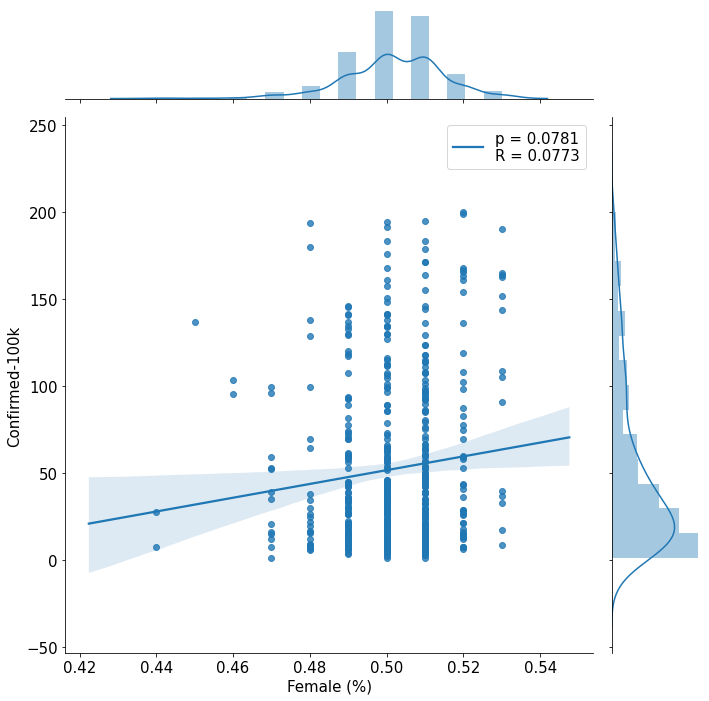

In [64]:
enter_fild += 1
col2 = df_mod.columns[0]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

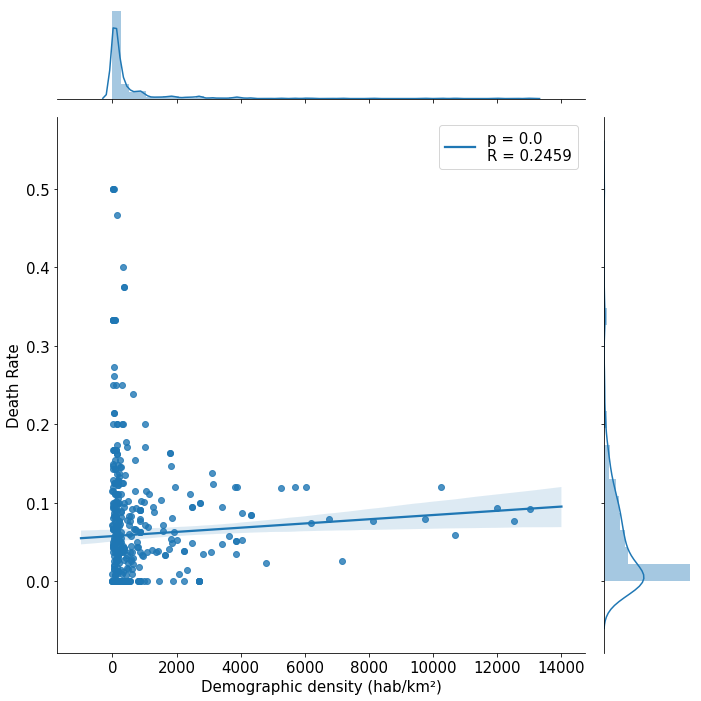

In [65]:
enter_fild = 2
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

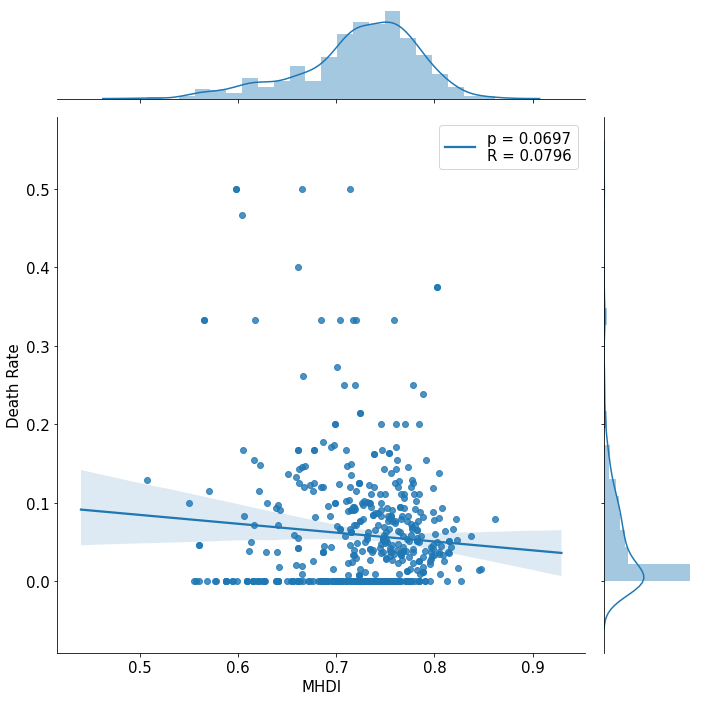

In [66]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

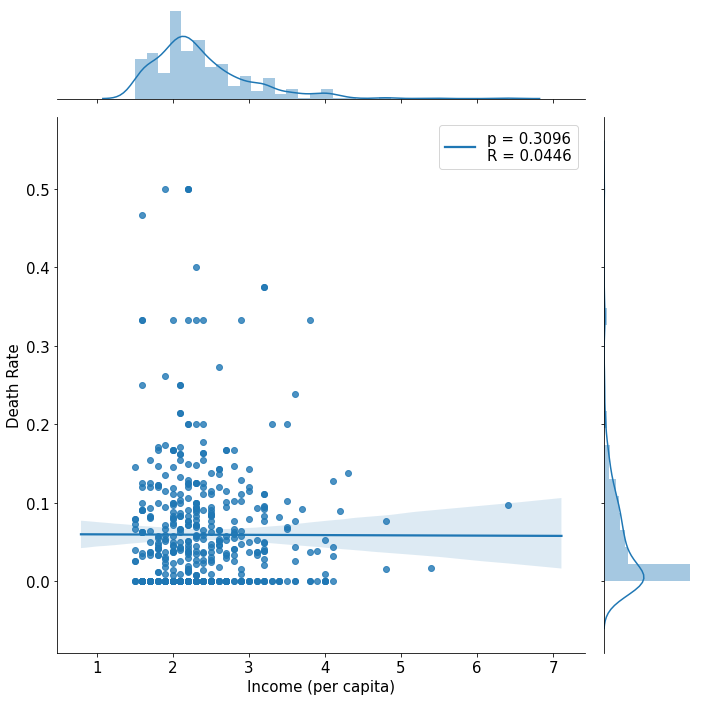

In [67]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

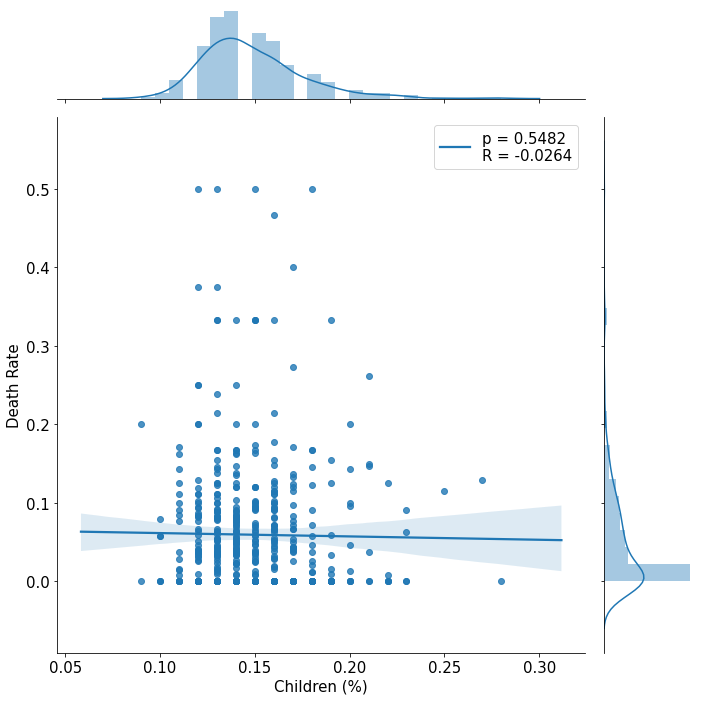

In [68]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

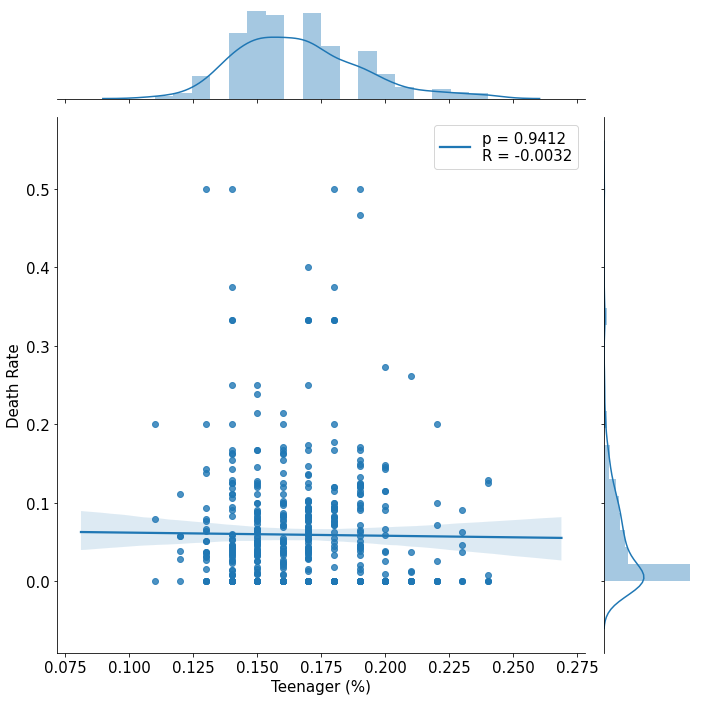

In [69]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

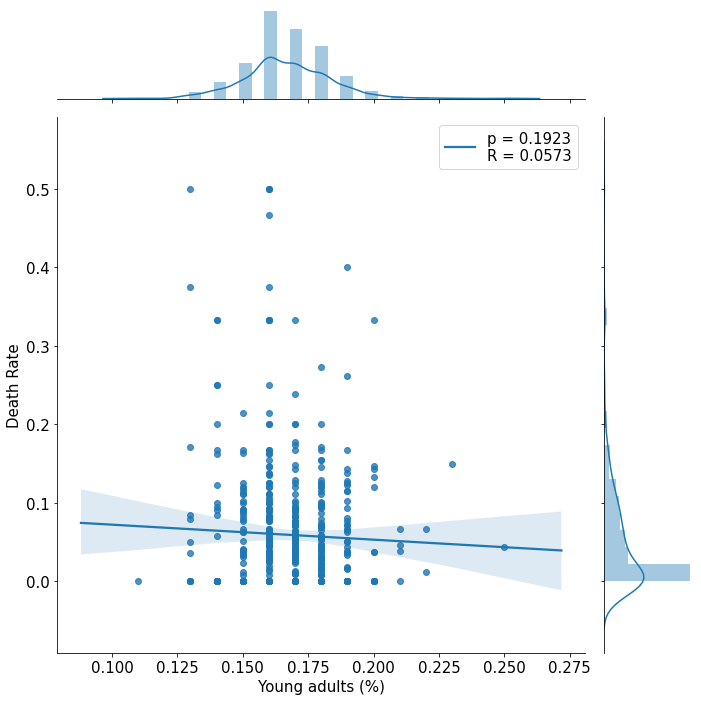

In [70]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

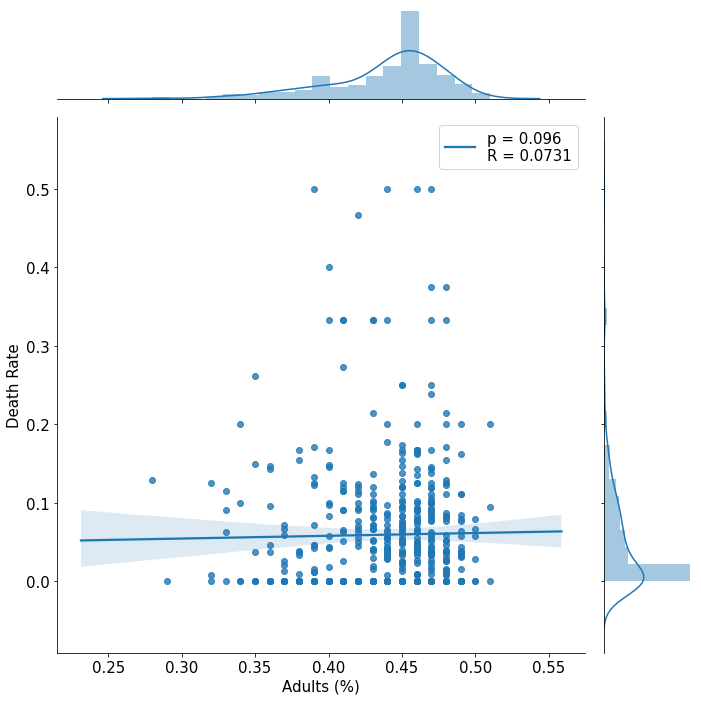

In [71]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

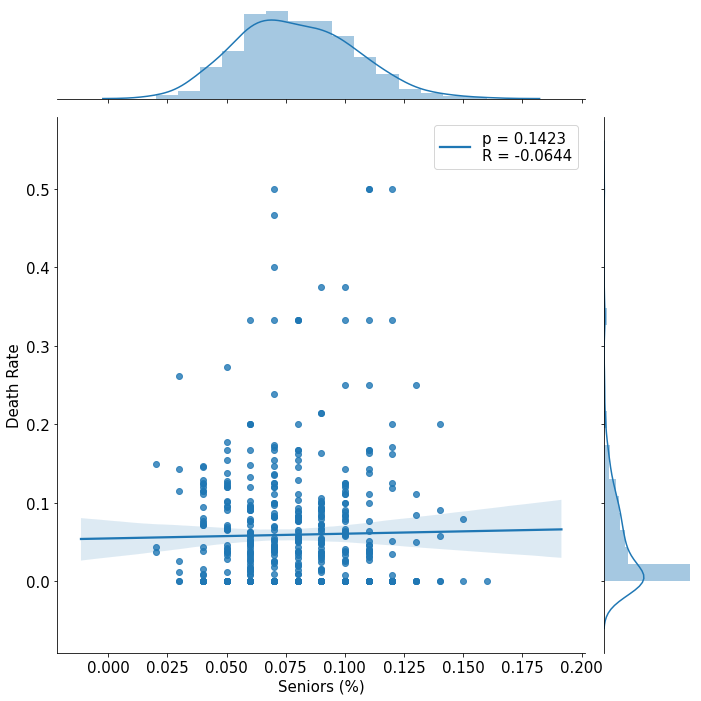

In [72]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

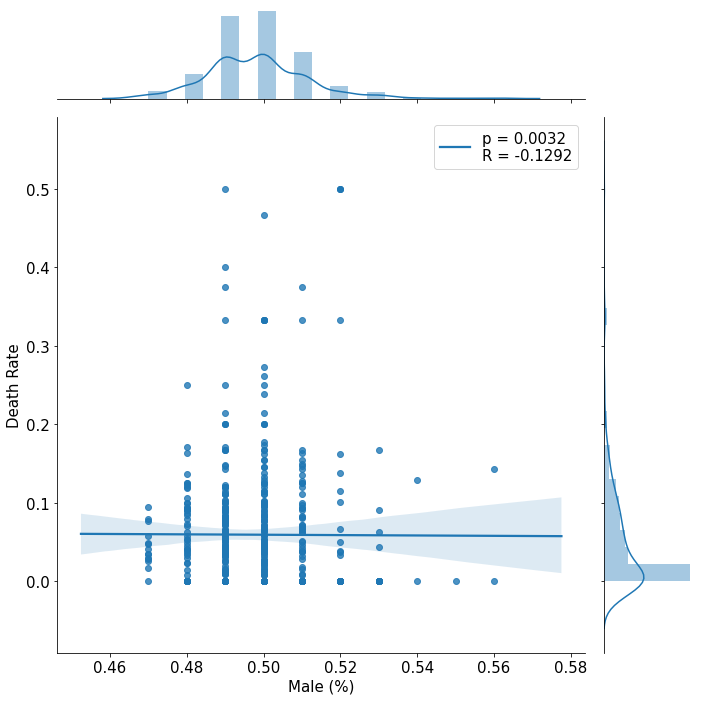

In [73]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

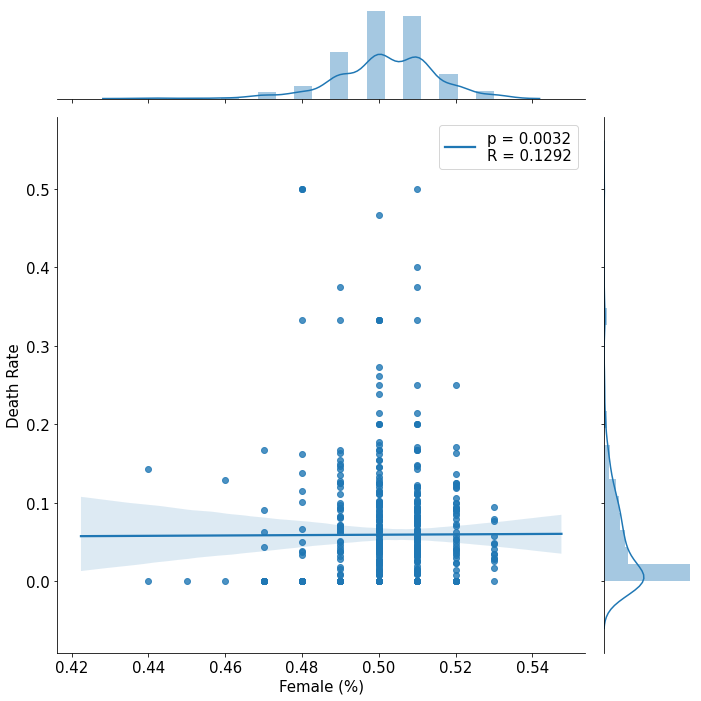

In [74]:
enter_fild += 1
col2 = df_mod.columns[1]
col1 = df_mod.columns[enter_fild]
pear_pos = stats.spearmanr(df_mod[col1], df_mod[col2])
sns.jointplot(
    x=col1,
    y=col2,
    kind="reg",
    truncate=False,
    height=10,
    data=df_mod
)
# plt.title('Spearman correlation\n\n\n\n\n\n\n')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)